### Описание проекта

#### **Название проекта:**  
**Прогнозирование спроса и анализ покупательского поведения в онлайн-ритейле**

---

#### **Основные цели проекта:**  
1. Выполнить разведочный анализ данных (EDA), чтобы понять основные закономерности в данных.
2. Провести сегментацию клиентов для выявления наиболее активных и прибыльных групп.
3. Построить модель для прогнозирования спроса на основе временных рядов.
4. Выявить ключевые факторы, влияющие на объем продаж.
5. Предоставить визуализацию результатов анализа для удобного понимания выводов.
6. Разработать рекомендации по увеличению продаж и удержанию клиентов.

---

#### **Основные задачи проекта:**
1. **Подготовка данных:**
   - Загрузка и проверка данных.
   - Очистка данных (удаление дубликатов, обработка пропусков, проверка выбросов).
   - Преобразование временных меток, категоризация данных.

2. **Разведочный анализ данных (EDA):**
   - Анализ временных рядов продаж.
   - Анализ популярности товаров по категориям.
   - Определение самых прибыльных клиентов и регионов.

3. **Сегментация клиентов:**
   - Выполнить RFM-анализ (Recency, Frequency, Monetary) для группировки клиентов.
   - Выявить целевые группы для маркетинговых активностей.

4. **Прогнозирование спроса:**
   - Построить базовую модель прогнозирования (Baseline).
   - Использовать продвинутые модели (например, ARIMA, Prophet, или LSTM).

5. **Валидация и тестирование:**
   - Оценить качество моделей с помощью метрик (RMSE, MAPE).
   - Провести кросс-валидацию и сравнить модели.

6. **Результаты и рекомендации:**
   - Подготовить визуализации результатов (например, динамика продаж, топовые товары, сегменты клиентов).
   - Предложить бизнес-рекомендации для увеличения продаж и удержания клиентов.

---

#### **Краткая информация о данных:**
- **Источник:** Набор данных "Online Retail II" из UCI Machine Learning Repository.
- **Период:** Транзакции с 1 декабря 2009 года по 9 декабря 2011 года.
- **Столбцы:**
  - `InvoiceNo`: Номер счета.
  - `StockCode`: Код товара.
  - `Description`: Описание товара.
  - `Quantity`: Количество проданных единиц.
  - `InvoiceDate`: Дата и время транзакции.
  - `Price`: Цена за единицу товара.
  - `CustomerID`: Идентификатор клиента.
  - `Country`: Страна.

---

#### **Критерии, которым будет соответствовать проект:**
1. **Анализ и обработка данных:**
   - Проведение качественного EDA.
   - Использование статистических тестов для подтверждения выводов.
   - Грамотная визуализация и выводы на основе графиков.

2. **Применение ML и DL:**
   - Наличие baseline-модели и доказательство превосходства финального решения.
   - Использование современных методов ML, таких как ансамблирование или глубокое обучение.
   - Гарантия воспроизводимости экспериментов.

3. **Оформление и документация:**
   - Чистый и читаемый код с комментариями.
   - Подробная документация в Jupyter Notebook.


### Разведочный анализ данных (EDA)

Начнем с загрузки и базового анализа данных, чтобы понять их структуру и выявить основные закономерности.

#### Шаги для EDA:
1. **Загрузка и предварительный осмотр данных**:
   - Проверим структуру данных, типы колонок, наличие пропусков и дубликатов.

2. **Очистка данных**:
   - Удалим дубликаты.
   - Проверим и обработаем пропущенные значения.
   - Выявим и обработаем выбросы.

3. **Разведочный анализ**:
   - Анализ временных рядов: динамика продаж по времени.
   - Распределение продаж по товарам, странам и клиентам.
   - Выявление самых популярных и прибыльных товаров.

4. **Визуализация данных**:
   - Построим графики, чтобы визуализировать основные зависимости.

In [1]:
import pandas as pd

# Укажите путь к файлу
file_path = "/Users/eduardgavrilov/Documents/IDE/1_yers_project/online_retail_II.xlsx"

# Загрузка данных с двух листов
sheet1 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
sheet2 = pd.read_excel(file_path, sheet_name="Year 2010-2011")

# Объединение данных
data = pd.concat([sheet1, sheet2], ignore_index=True)

# Проверка результата
print(f"Размер объединенного набора данных: {data.shape}")
# Основная информация о данных
print(data.info())

# Просмотр первых строк данных
data.head()



Размер объединенного набора данных: (1067371, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [62]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [2]:
# Проверка на дубликаты
duplicates = data.duplicated().sum()
print(f"\nКоличество полных дубликатов: {duplicates}")

# Пропуски в данных
missing_data = data.isnull().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_data)

# Анализ выбросов в 'Quantity' и 'Price'
print("\nСтатистика по количеству товаров (Quantity):")
print(data['Quantity'].describe())
print("\nСтатистика по ценам (Price):")
print(data['Price'].describe())

# Проверка на отрицательные значения
negative_values = data[(data['Quantity'] < 0) | (data['Price'] < 0)]
print(f"\nКоличество записей с отрицательными значениями: {negative_values.shape[0]}")

# Работа с временными данными
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour
print("\nДобавлены временные признаки: Year, Month, DayOfWeek, Hour")

# Вывод преобразованных данных
print("\nОбновленный набор данных с временными признаками:")
print(data.head())


Количество полных дубликатов: 34335

Количество пропусков в каждом столбце:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Статистика по количеству товаров (Quantity):
count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

Статистика по ценам (Price):
count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
25%      1.250000e+00
50%      2.100000e+00
75%      4.150000e+00
max      3.897000e+04
Name: Price, dtype: float64

Количество записей с отрицательными значениями: 22955

Добавлены временные признаки: Year, Month, DayOfWeek, Hour

Обновленный набор данных с временными признаками:
  Invoice StockCode                          Description  Quantity  \
0  489434  

In [7]:
data_cleaned = data.dropna(subset=['Description', 'Customer ID']).drop_duplicates()

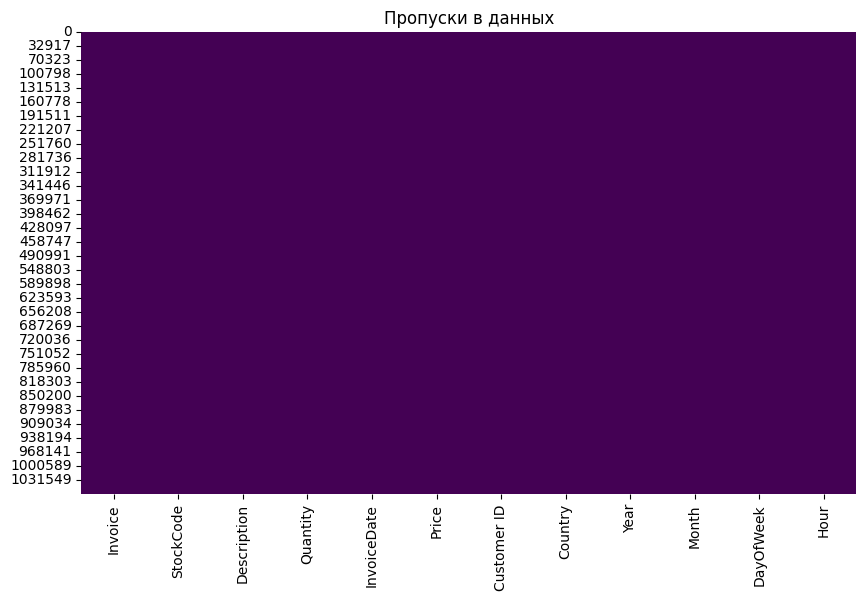

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isna(), cbar=False, cmap="viridis")
plt.title("Пропуски в данных")
plt.show()


In [38]:
data_cleaned.Invoice.value_counts()

Invoice
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C554535      1
C554536      1
C554541      1
C499791      1
526633       1
Name: count, Length: 44876, dtype: int64

In [39]:
# Фильтрация возвратов на основе значения в 'Invoice'
returned_data = data_cleaned[data_cleaned['Invoice'].str.startswith('C', na=False)]

# Подсчет количества уникальных товаров с возвратами
returned_items_count = returned_data['StockCode'].nunique()

# Подсчет общего числа записей с возвратами
returned_records_count = returned_data.shape[0]

# Вывод результатов
print(f"Количество уникальных товаров, по которым были возвраты: {returned_items_count}")
print(f"Общее количество записей с возвратами: {returned_records_count}")


Количество уникальных товаров, по которым были возвраты: 2850
Общее количество записей с возвратами: 18390


In [40]:
# Удаление строк с возвратами
data_cleaned = data_cleaned[~data_cleaned['Invoice'].str.startswith('C', na=False)]

# Проверка размера нового набора данных
print(f"Размер данных после удаления возвратов: {data_cleaned.shape}")


Размер данных после удаления возвратов: (779495, 12)


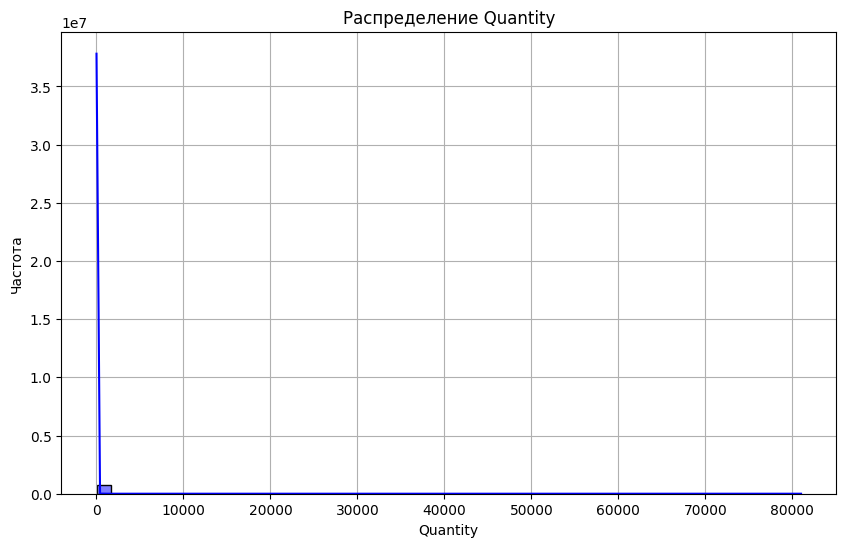

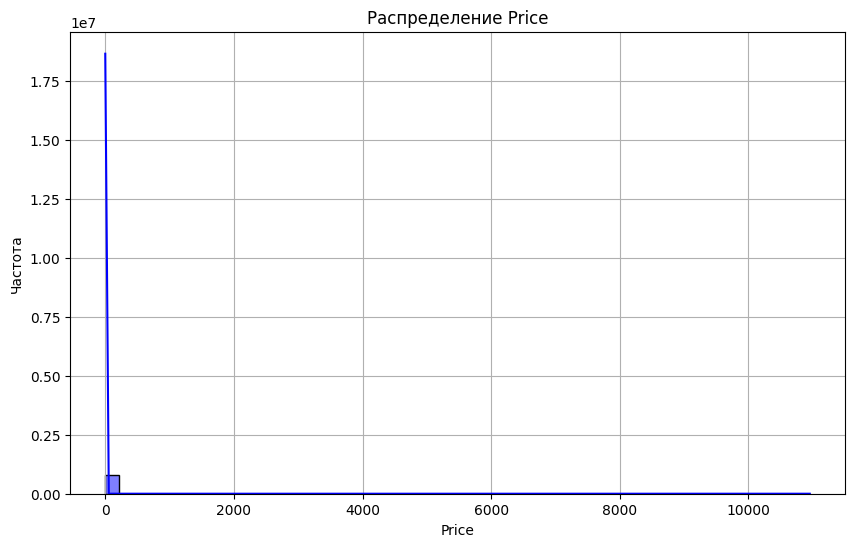

Статистическое описание количественных переменных:
             Quantity          Price
count  779495.000000  779495.000000
mean       13.507085       3.218199
std       146.540284      29.674823
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   10953.500000


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список количественных переменных
quantitative_columns = ['Quantity', 'Price']

# Построение гистограмм и графиков плотности для каждого количественного признака
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[col], bins=50, kde=True, color='blue')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

# Проверка статистических характеристик количественных переменных
quantitative_summary = data_cleaned[quantitative_columns].describe()
print("Статистическое описание количественных переменных:\n", quantitative_summary)


In [42]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year', 'Month', 'DayOfWeek',
       'Hour'],
      dtype='object')

In [50]:
data_cleaned['sum_product'] = data_cleaned['Quantity'] * data_cleaned['Price']

/var/folders/v9/c4d6j8t16p3_3bct2sxd0sw00000gn/T/ipykernel_6061/4145500017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sum_product'] = data_cleaned['Quantity'] * data_cleaned['Price']


In [59]:
top_20_products = (
    data_cleaned.groupby(['Description', 'Price'])
    .agg({'Quantity': 'sum', 'sum_product': 'max'})
    .sort_values(by='Quantity', ascending=False)
    .head(20)
)

# Вывод результатов
print("Топ-20 товаров с максимальными продажами (Quantity):")
top_20_products


Топ-20 товаров с максимальными продажами (Quantity):


,,Quantity,sum_product
Description,Price,,
"PAPER CRAFT , LITTLE BIRDIE",2.08,80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,1.04,76087,77183.60
WHITE HANGING HEART T-LIGHT HOLDER,2.55,57577,4921.50
WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.21,45660,1008.00
ASSORTED COLOUR BIRD ORNAMENT,1.69,44549,540.80
WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29,34078,167.04
ASSORTED COLOUR BIRD ORNAMENT,1.45,32581,4176.00
SMALL POPCORN HOLDER,0.72,30814,3096.00
MINI PAINT SET VINTAGE,0.65,30627,748.80


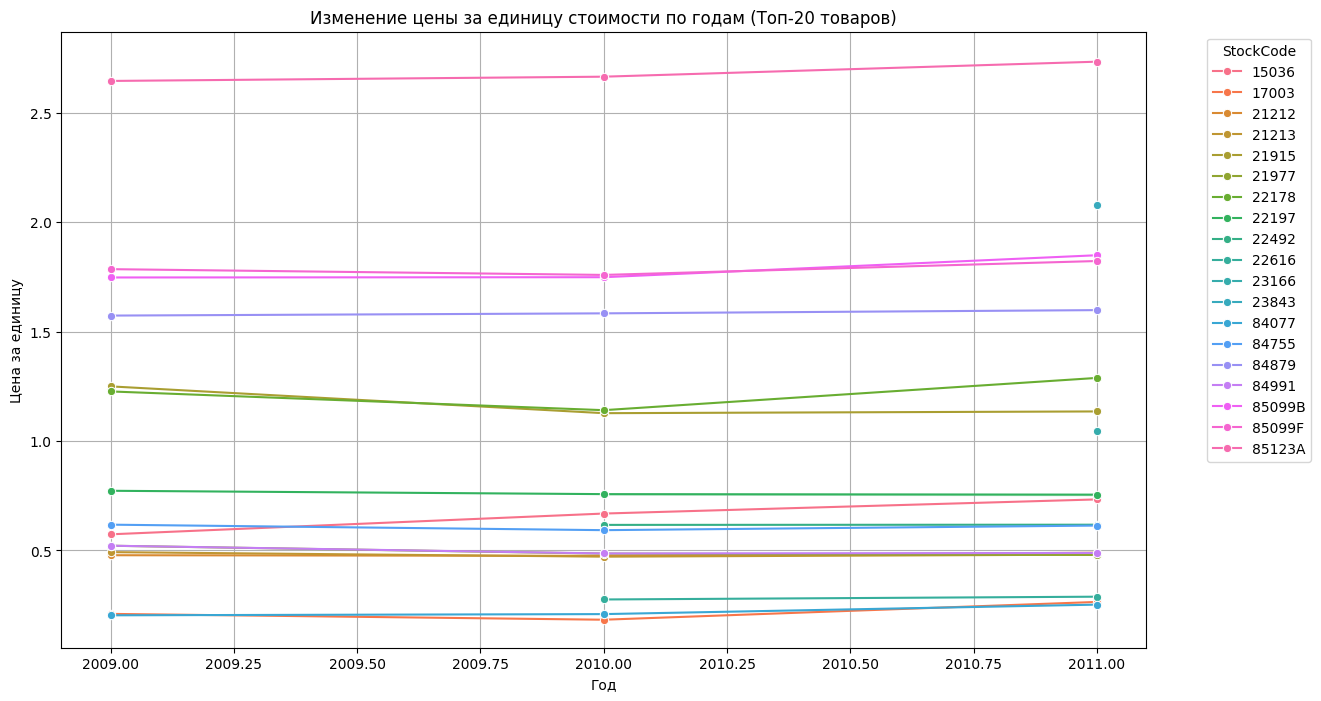

Изменение цены за единицу стоимости по годам (Топ-20 товаров):


,StockCode,Description,Year,TotalQuantity,TotalRevenue,AvgPrice,UnitPriceChange
0,15036,ASSORTED COLOURS SILK FAN,2009,535,306.95,0.634545,0.573738
1,15036,ASSORTED COLOURS SILK FAN,2010,18715,12513.93,0.729029,0.668658
2,15036,ASSORTED COLOURS SILK FAN,2011,21744,15945.44,0.806762,0.733326
3,17003,BROCADE RING PURSE,2009,791,166.11,0.210000,0.210000
4,17003,BROCADE RING PURSE,2010,47483,8704.23,0.203146,0.183313
5,17003,BROCADE RING PURSE,2011,21808,5770.62,0.326061,0.264610
6,21212,PACK OF 72 RETRO SPOT CAKE CASES,2009,4778,2284.70,0.534035,0.478171
7,21212,PACK OF 72 RETRO SPOT CAKE CASES,2010,40351,19553.53,0.536698,0.484586
8,21212,PACK OF 72 RETROSPOT CAKE CASES,2010,14623,6812.68,0.534586,0.465888
9,21212,PACK OF 72 RETROSPOT CAKE CASES,2011,30098,14739.12,0.549662,0.489704


In [65]:
# Группировка для выбора топ-20 товаров по количеству продаж (Quantity)
top_20_stockcodes = (
    data_cleaned.groupby(['StockCode', 'Description'])['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index.get_level_values('StockCode')  # Извлекаем StockCode
)

# Фильтрация данных по топ-20 StockCode
filtered_data = data_cleaned[data_cleaned['StockCode'].isin(top_20_stockcodes)]

# Группировка по годам для анализа изменения цены за единицу
price_per_year = (
    filtered_data.groupby(['StockCode', 'Description', 'Year'])
    .agg(
        TotalQuantity=('Quantity', 'sum'),
        TotalRevenue=('Price', lambda x: (x * filtered_data.loc[x.index, 'Quantity']).sum()),
        AvgPrice=('Price', 'mean')  # Средняя цена за год
    )
    .reset_index()
)

# Рассчитываем цену за единицу стоимости
price_per_year['UnitPriceChange'] = price_per_year['TotalRevenue'] / price_per_year['TotalQuantity']

# Визуализация изменения цены за единицу стоимости по годам для каждого товара
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=price_per_year, x='Year', y='UnitPriceChange', hue='StockCode', marker='o')
plt.title('Изменение цены за единицу стоимости по годам (Топ-20 товаров)')
plt.xlabel('Год')
plt.ylabel('Цена за единицу')
plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Проверка данных
print("Изменение цены за единицу стоимости по годам (Топ-20 товаров):")
price_per_year.head(20)

